In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
from sklearn import metrics
warnings.simplefilter(action='ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error

In [ ]:
houses = pd.read_csv("/content/drive/MyDrive/datasets/houses.csv")
houses.head(100)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,22.19
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,53.80
2,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,18.00
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,60.40
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,2.50,3300,1.0,0,0,3,7,2390,910,1946,1991,47.5873,-122.249,1950,90.50
96,3,1.75,1960,1.0,0,0,3,7,1960,0,1967,0,47.3576,-122.277,1750,24.75
97,4,1.50,1160,1.0,0,0,4,7,1160,0,1975,0,47.3036,-122.378,1160,19.90
98,3,1.75,1810,1.0,0,0,5,7,1210,600,1980,0,47.4109,-121.958,1650,31.40


In [ ]:
houses.shape

(999, 16)

In [ ]:
houses.describe()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,3.349349,2.045796,2051.397397,1.446947,0.008008,0.237237,3.464464,7.605606,1750.233233,301.164164,1969.030030,81.830831,47.549720,-122.207406,1986.813814,52.071452
std,0.852367,0.721983,888.351113,0.517420,0.089173,0.765472,0.689521,1.160734,790.466905,451.023402,28.198607,395.767918,0.141558,0.139564,670.723475,33.974907
min,0.000000,0.000000,380.000000,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1900.000000,0.000000,47.177500,-122.490000,830.000000,8.000000
25%,3.000000,1.500000,1405.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,47.443000,-122.322500,1490.000000,30.980000
50%,3.000000,2.000000,1900.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,47.563600,-122.218000,1850.000000,43.500000
75%,4.000000,2.500000,2475.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2135.000000,580.000000,1992.000000,0.000000,47.673400,-122.118000,2360.000000,63.446250
max,7.000000,5.000000,6070.000000,3.500000,1.000000,4.000000,5.000000,12.000000,6070.000000,2060.000000,2015.000000,2014.000000,47.777600,-121.709000,4760.000000,308.000000


In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    int64  
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    int64  
 3   floors         999 non-null    float64
 4   waterfront     999 non-null    int64  
 5   view           999 non-null    int64  
 6   condition      999 non-null    int64  
 7   grade          999 non-null    int64  
 8   sqft_above     999 non-null    int64  
 9   sqft_basement  999 non-null    int64  
 10  yr_built       999 non-null    int64  
 11  yr_renovated   999 non-null    int64  
 12  lat            999 non-null    float64
 13  long           999 non-null    float64
 14  sqft_living15  999 non-null    int64  
 15  price          999 non-null    float64
dtypes: float64(5), int64(11)
memory usage: 125.0 KB


In [ ]:
houses.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
price            0
dtype: int64

As we can see There are no any null values in dataset, so there is no need of removing null values from dataset

To get the mean value of the price according to the number of bedrooms.

In [ ]:
house_bedrooms=houses.groupby(['bedrooms'])['price'].mean().reset_index()
house_bedrooms

,bedrooms,price
0,0,110.000000
1,1,24.298571
2,2,39.533956
3,3,45.374242
4,4,61.712832
5,5,75.243522
6,6,67.677273
7,7,195.000000


Text(0, 0.5, 'Mean Price')

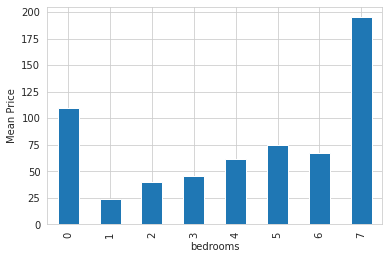

In [ ]:
house_bedrooms=houses.groupby(['bedrooms'])['price'].mean().plot(kind='bar')
plt.ylabel("Mean Price")

To get the detailed view of how the number of bedrooms is according to the price.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2df48f1a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2df48ff190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2df48f1730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2df48ff850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2df48ffb50>],
 'means': []}

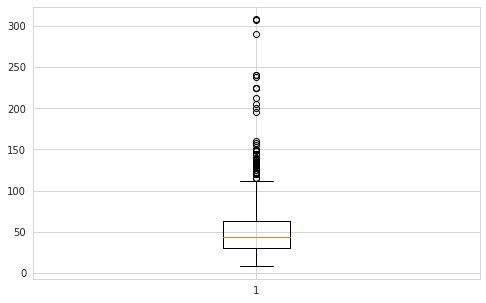

In [ ]:
plt.figure(figsize=(8,5))
plt.boxplot(houses.price)

As we can see that there are so many outliers in price column, so they can make difference while predicting the house price value. 

Removing outliers from the price column 

In [ ]:
Q1 = np.percentile(houses.price, 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(houses.price, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", houses.shape)
 
# Upper bound
upper = np.where(houses.price >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(houses.price <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
houses.drop(upper[0], inplace = True)
houses.drop(lower[0], inplace = True)
 
print("New Shape: ", houses.shape)

Old Shape:  (999, 16)
New Shape:  (954, 16)


As we can see that the number of rows are reduced, the value is reduced because the outliers are removed.

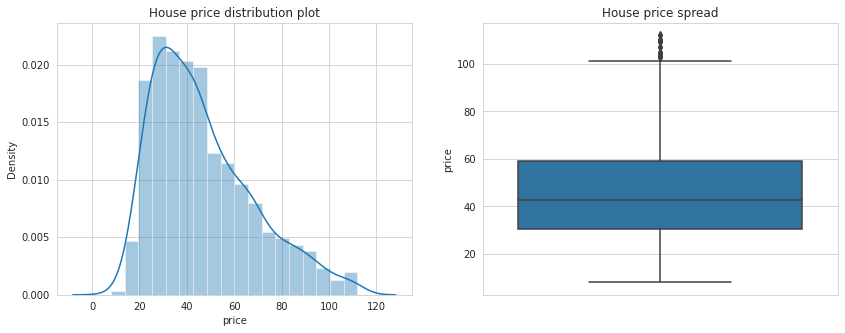

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('House price distribution plot')
sns.distplot(houses.price)
plt.subplot(1,2,2)
plt.title('House price spread')
sns.boxplot(y=houses.price)
plt.show()

Distribution Plot :
In the distribution plot we can see the distribution of price value. The price value distributes from 10 to 110 and the distribution curve is normal.

Box Plot :
In the box plot we can observe that the outliers of price column are removed so there are no any outliers present in price column.

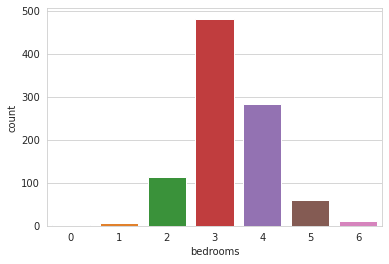

In [ ]:
sns.countplot(houses['bedrooms'],  orient='v')
plt.show()

From this countplot we can get the count of bedrooms.

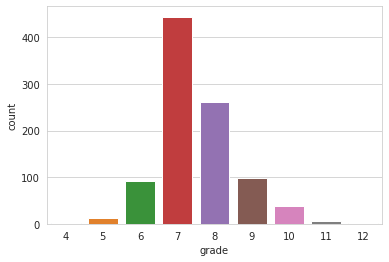

In [ ]:
sns.countplot(houses['grade'],  orient='v')
plt.show()

From this countplot we can get the count of grade.

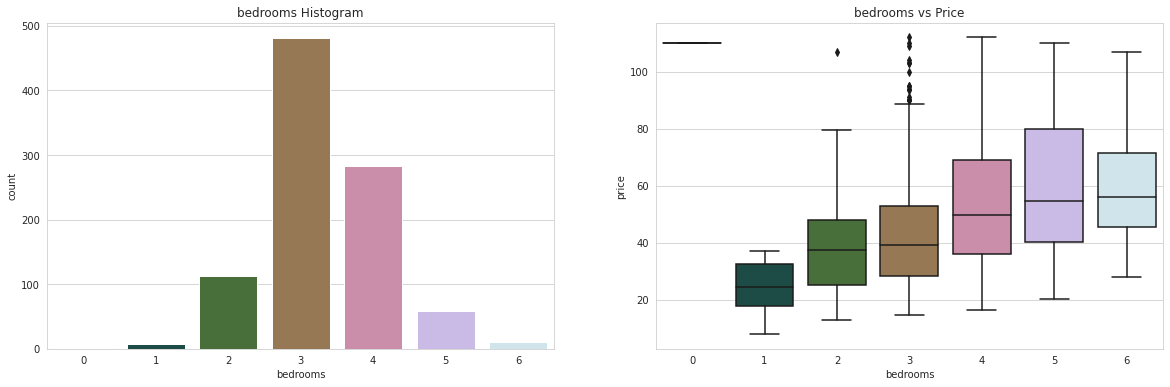

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('bedrooms Histogram')
sns.countplot(houses.bedrooms, palette=("cubehelix"))
plt.subplot(1,2,2)
plt.title('bedrooms vs Price')
sns.boxplot(x=houses.bedrooms, y=houses.price, palette=("cubehelix"))
plt.show()

Histogram :
From histogram graph we can get see that the frequency of bedrooms 3 is higher than other number of bedrooms. So, the 3 bedrooms houses are more in the dataset.

Boxplot :
From boxplot we can observe that the bedroom price for per squarefeet ranges from minimum 10 to 130 and there are no any outliers.

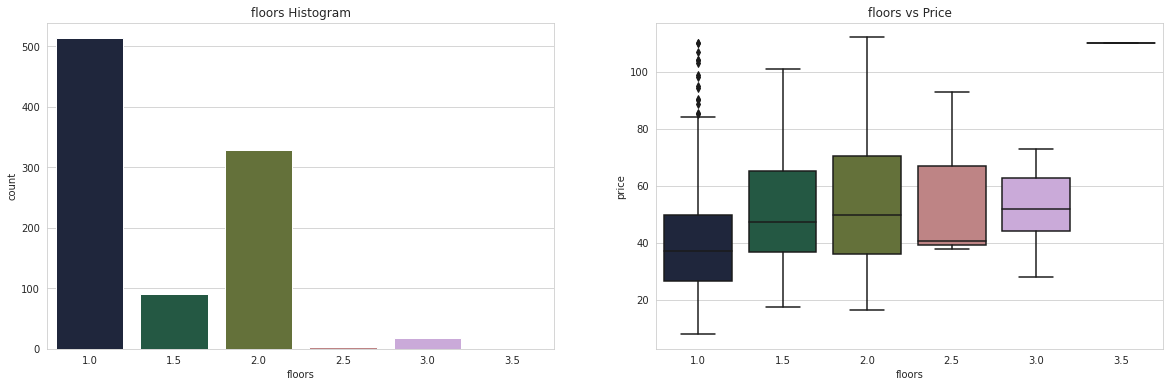

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('floors Histogram')
sns.countplot(houses.floors, palette=("cubehelix"))
plt.subplot(1,2,2)
plt.title('floors vs Price')
sns.boxplot(x=houses.floors, y=houses.price, palette=("cubehelix"))
plt.show()

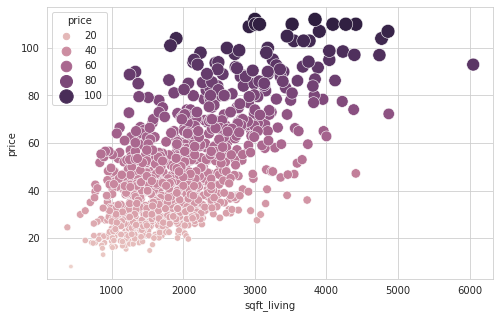

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living',y='price',hue='price',size='price',sizes=(20,200),data=houses)
plt.show()

From the scatter point we can observe that the relationship between the sqft_living area and price is strongly positive correlation and there is one outlier in sqft_living.

Finding Correlation between the columns to get the details of relationship between them.

Correlation Can be defined in 2 types :
1. Positive Cprrelation
2. Negative Correlation

In [ ]:
houses.corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
bedrooms,1.000000,0.466179,0.563194,0.175070,-0.088562,-0.017510,0.055421,0.353436,0.466121,0.251737,0.138676,0.002099,-0.018073,0.104654,0.376772,0.291706
bathrooms,0.466179,1.000000,0.684999,0.482176,-0.013348,0.042799,-0.086443,0.617830,0.619484,0.218294,0.532337,-0.014537,0.011383,0.269093,0.561137,0.422746
sqft_living,0.563194,0.684999,1.000000,0.356442,-0.041346,0.151044,-0.010031,0.720147,0.840843,0.424898,0.327683,-0.008012,0.102380,0.241392,0.764073,0.638397
floors,0.175070,0.482176,0.356442,1.000000,0.024976,-0.017074,-0.224561,0.434002,0.568557,-0.298168,0.418057,0.018284,0.078432,0.166623,0.306783,0.306172
waterfront,-0.088562,-0.013348,-0.041346,0.024976,1.000000,0.303370,0.044575,-0.026916,-0.034491,-0.018027,-0.050338,0.089445,-0.044182,-0.083747,-0.006866,0.028928
view,-0.017510,0.042799,0.151044,-0.017074,0.303370,1.000000,0.095121,0.093278,0.026419,0.232400,-0.068462,-0.000275,0.013162,-0.102872,0.199266,0.218608
condition,0.055421,-0.086443,-0.010031,-0.224561,0.044575,0.095121,1.000000,-0.078715,-0.118572,0.179933,-0.301892,-0.071571,-0.065555,-0.143494,-0.055875,0.062799
grade,0.353436,0.617830,0.720147,0.434002,-0.026916,0.093278,-0.078715,1.000000,0.715489,0.122094,0.460956,-0.053498,0.124338,0.222041,0.697584,0.628127
sqft_above,0.466121,0.619484,0.840843,0.568557,-0.034491,0.026419,-0.118572,0.715489,1.000000,-0.132715,0.426103,-0.016623,0.030376,0.361656,0.742916,0.551927
sqft_basement,0.251737,0.218294,0.424898,-0.298168,-0.018027,0.232400,0.179933,0.122094,-0.132715,1.000000,-0.112587,0.013129,0.136671,-0.162816,0.156658,0.245941


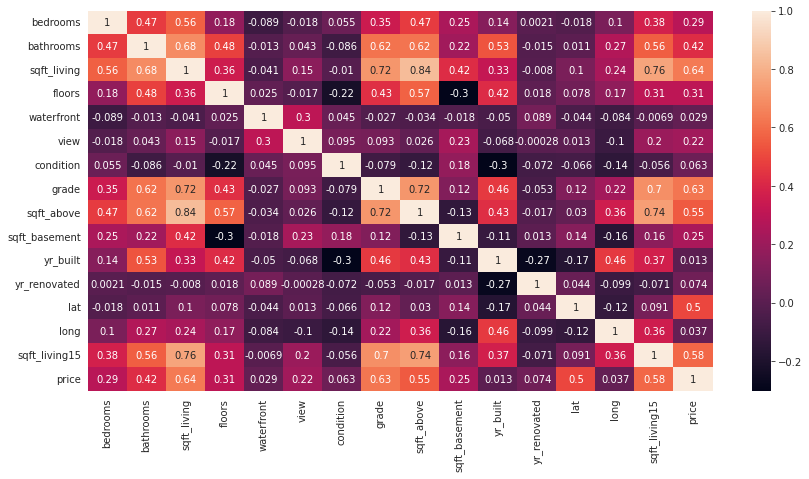

In [ ]:
f,ax=plt.subplots(figsize=(14,7))
sns.heatmap(houses.corr(),   annot=True)

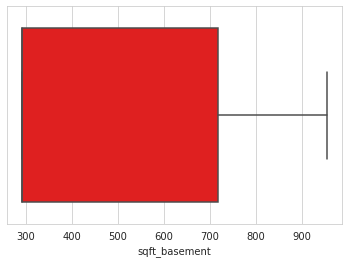

In [ ]:
houses['sqft_basement']=houses['sqft_basement'].rank()
sns.boxplot(houses['sqft_basement'],color='red')

LabelEncoder Helps to normalize labels. this trnsforms non-numerical labels into numerical labels.converts labels into 0 and 1's.

In [ ]:
lab=LabelEncoder()
houses['bedrooms']=lab.fit_transform(houses['bedrooms'])
houses['sqft_living']=lab.fit_transform(houses['sqft_living'])
houses['sqft_above']=lab.fit_transform(houses['sqft_above'])
houses['sqft_basement']=lab.fit_transform(houses['sqft_basement'])
houses['sqft_living15']=lab.fit_transform(houses['sqft_living15'])

In [ ]:
houses.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
0,3,1.00,46,1.0,0,0,3,7,53,0,1955,0,47.5112,-122.257,40,22.19
1,3,2.25,191,2.0,0,0,3,7,156,27,1951,1991,47.7210,-122.319,78,53.80
2,2,1.00,9,1.0,0,0,3,6,12,0,1933,0,47.7379,-122.233,186,18.00
3,4,3.00,128,1.0,0,0,5,7,40,77,1965,0,47.5208,-122.393,42,60.40
4,3,2.00,99,1.0,0,0,3,8,106,0,1987,0,47.6168,-122.045,90,51.00


In [ ]:
X= houses.drop(['price'], axis=1)
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15'],
      dtype='object')

In [ ]:
# X=houses[['bathrooms','bedrooms','sqft_living','floors','condition','grade','sqft_above','sqft_basement','sqft_living15']]
Y=houses['price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

StandardScaler is useful in standardize the data. This removes the mean and scaling to unit variance. This provides structure for creating and maintaining the data quality.

In [ ]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [ ]:
LinearRegressionModel = LinearRegression(fit_intercept=bool, normalize=False,copy_X=True,n_jobs=1)
LinearRegressionModel.fit(X_train, Y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, Y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, Y_test))

Linear Regression Train Score is :  0.7236987174566007
Linear Regression Test Score is :  0.6632411420349444


In [ ]:
y_pred = LinearRegressionModel.predict(X_test)
y_pred

array([41.54997917, 88.64306026, 60.44328163, 76.52984996, 52.9767504 ,
       48.43910256, 63.36386991, 77.44037939, 41.60379838, 66.49005789,
       73.81153998, 58.09511457, 20.37856788, 77.44787847, 66.32040299,
       72.69284783, 61.47031132, 39.12936353, 51.43309317, 29.62059569,
       86.58630234, 67.90830983, 32.65428423, 36.6521146 , 45.43936716,
       34.6088374 , 26.85294291, 13.13044764, 60.82152455, 57.77299463,
       53.92554287, 24.47025034, 37.47973302, 71.85086866, 20.26190609,
       54.13994123, 19.89627488, 56.1766563 , 46.92766009, 55.76652419,
       42.68883621, 76.06465157, 41.24088851, 54.38684204, 29.21447521,
       53.61539705, 75.46442436, 32.78820365, 36.69915263, 24.04491094,
       62.18078821, 47.93643606, 46.02329701, 26.070755  , 41.00864714,
       54.43740701, 36.33935985, 40.9498278 , 63.56604975, 19.26751091,
       63.88340123, 63.06208381, 70.07547726, 56.72577322, 40.95492093,
       37.3721533 , 36.2057073 , 41.2821019 , 22.08955827, 74.66

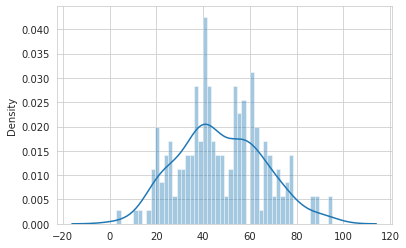

In [ ]:
sns.distplot((y_pred ), bins=50)

Text(0, 0.5, 'Y_pred')

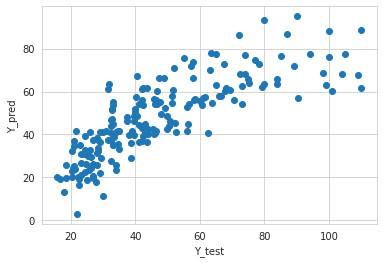

In [ ]:
plt.scatter(Y_test,y_pred )
plt.xlabel("Y_test")
plt.ylabel("Y_pred")

In [ ]:
R2 = metrics.r2_score(Y_test, y_pred)
print("R2 Error ",R2)
MSE = mean_squared_error(Y_test,y_pred)
print("Mean Squared Error ",MSE)
MAE = mean_absolute_error(Y_test,y_pred)
print("Mean Absolute Error ",MAE)

R2 Error  0.6632411420349444
Mean Squared Error  169.76750036704223
Mean Absolute Error  9.913326947490338
